This notebook aims to use ANN and KNN to classify whether a patient does or does not have diabetes. The dataset can be found at https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Number of rows:  768
Number of columns:  9


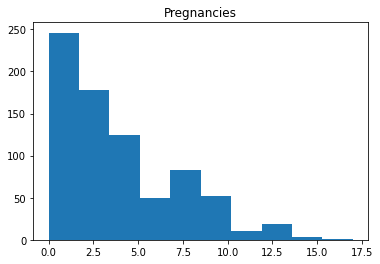

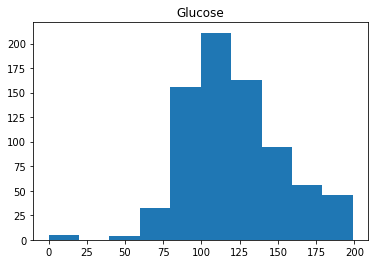

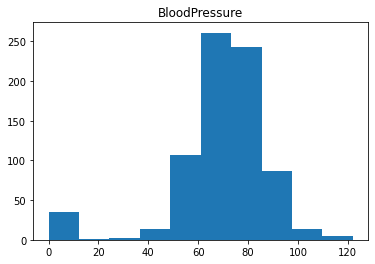

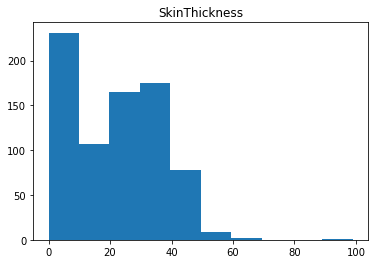

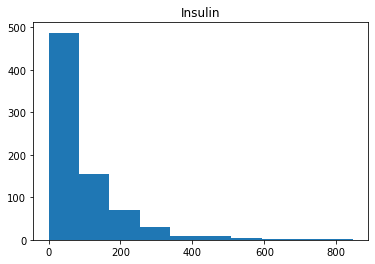

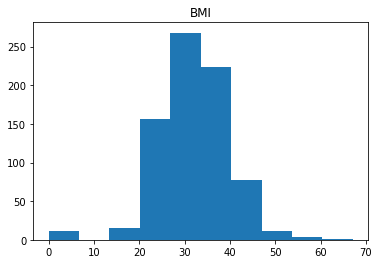

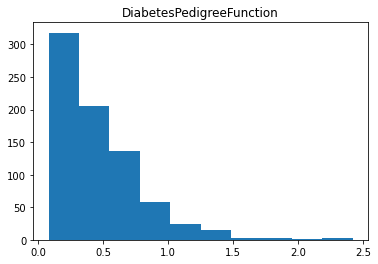

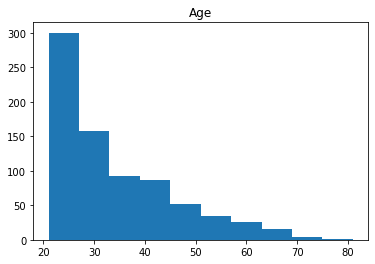

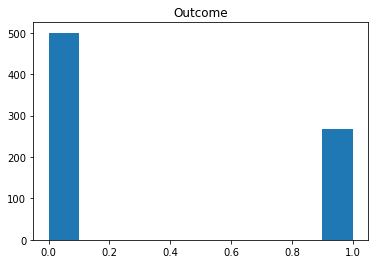

In [2]:
#Import the dataset from local drive
df = pd.read_csv(r'C:\Users\JamesBright\OneDrive - Harnham Search and Selection Ltd\Documents\1. Kaggle\0. Pima Indians\diabetes.csv')

#Check that the import has worked correctly
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

#Plot a histogram for each of the columns in df to get an idea of how the data looks
for i in df:
    counts, bins = np.histogram(df[i])
    plt.hist(bins[:-1], bins, weights = counts)
    plt.title(i)
    plt.show()
#The histograms show that some data cleaning is required. BMI, Glucose, Insulin, Skin Thickness of zero seem odd

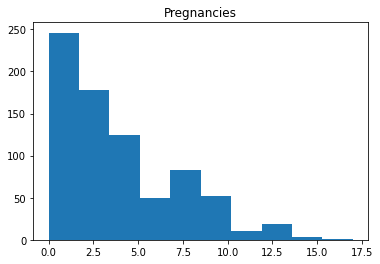

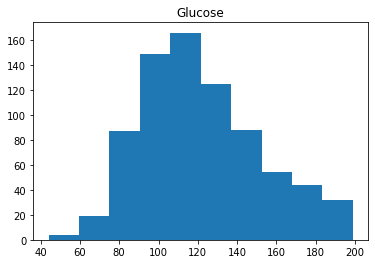

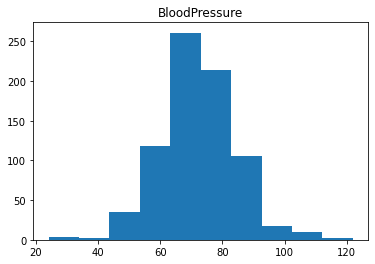

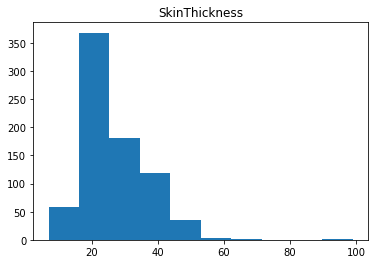

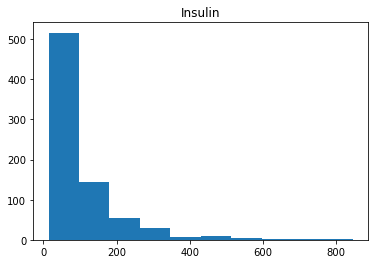

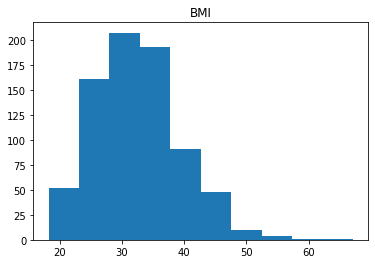

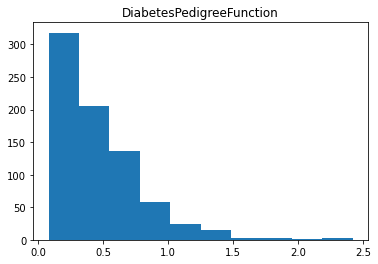

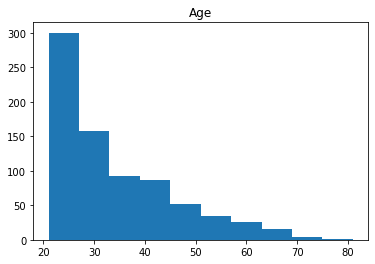

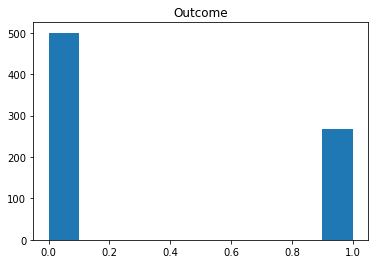

In [3]:
#Replace weird zero values with the mean for the column
# Glucose
df['Glucose'] = np.where(df['Glucose'] == 0, df['Glucose'].mean(), df['Glucose'])
# Blood  Pressure
df['BloodPressure'] = np.where(df['BloodPressure'] == 0, df['BloodPressure'].mean(), df['BloodPressure'])
# Skin Thickness
df['SkinThickness'] = np.where(df['SkinThickness'] == 0, df['SkinThickness'].mean(), df['SkinThickness'])
# Insulin
df['Insulin'] = np.where(df['Insulin'] == 0, df['Insulin'].mean(), df['Insulin'])
# BMI
df['BMI'] = np.where(df['BMI'] == 0, df['BMI'].mean(), df['BMI'])

#Plot the new histograms with the cleaned data
for i in df:
    counts, bins = np.histogram(df[i])
    plt.hist(bins[:-1], bins, weights = counts)
    plt.title(i)
    plt.show()

In [5]:
# Both K-Means and ANN work better with standardised data (mean 0, standard deviation of 1). This is so that fields with
# larger absolute values are not given more importance.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Scales the input data to be of a standard normal distribution
scale_X = StandardScaler()
X_scaled = pd.DataFrame(scale_X.fit_transform(df.drop(['Outcome'], axis = 1),), 
                        columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                                  'DiabetespedigreeFunction', 'Age'])
X_scaled.head()

#split the data set up into test and train data
X= X_scaled.to_numpy()[:,0:8]
Y= df.to_numpy()[:,8]
seed = 53
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_test)
print(Y_test)

[[ 0.63994726 -0.77858541 -1.17730081 ...  0.22547203 -0.1264714
   0.83038113]
 [-0.54791859 -0.31830429  0.22672482 ...  0.47289246 -0.97814487
  -1.04154944]
 [-0.54791859 -0.44981318 -0.68176235 ... -0.24026054 -0.94794368
  -1.04154944]
 ...
 [ 1.23388019 -0.87721708 -0.0210444  ...  0.63298803  0.03963513
   2.02160968]
 [-0.54791859  0.7995213  -0.18622389 ... -0.64777654 -0.40734244
  -0.36084741]
 [ 1.23388019 -1.56763877 -0.18622389 ...  0.41467589  0.70406123
   0.49003012]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]


In [83]:
#ANN model fitting
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

#definie a model to be used for fitting. In this case, four layers of 8,8,8, and 1 nodes.
model =  Sequential([
    Dense(8, input_dim = (8), activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

#compile the model and specify how training will be optimised
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

#Fit the model to the train data
history = model.fit(X_train, Y_train, epochs = 150, batch_size = 32, verbose = 1)

#evaluate the performance of the model on the test data
scores =  model.evaluate(X_test, Y_test)
print(f'{model.metrics_names[1]} : {round(scores[1]*100,2)}%')

#to obtain the full confusion matrix
y_pred = model.predict(X_test)
# The sigmoid activation function used in the output layer of the model returns values between 0 and 1 (probablilty
# that the outcome is 1. Round these to the closest whole number for comparison with test data)
y_pred_ann = (np.around(y_pred,0))

ann_confusion = confusion_matrix(Y_test, y_pred_ann)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 8)                 72        
                                                                 
 dense_120 (Dense)           (None, 8)                 72        
                                                                 
 dense_121 (Dense)           (None, 8)                 72        
                                                                 
 dense_122 (Dense)           (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
20/20 [==============================] - 1s 1ms/step - loss: 0.7197 - accuracy: 0.4300
Epoch 2/150
20/20 [==============================] - 0s 1ms/step - loss: 0.6867 - accura

In [69]:
# K Nearest Neighbors goes here
# Optimise the number of neighbors
from sklearn.neighbors import KNeighborsClassifier

# Set up empty lists for the test and train scores
test_scores = []
train_scores = []

# Test the K-means classification using 1-15 neighbors and store the accuracy on the train and test sets in their
# respective lists
for i in range (1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

# Output the maximum test and train scores
max_train_score = max(train_scores)
print(max_train_score)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print(train_scores_ind)

max_test_score = max(test_scores)
print(max_test_score)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print(test_scores_ind[0])

#Run k neighbors using optimal number of neighbors (best accuracy)
knn_final = KNeighborsClassifier(test_scores_ind[0])

# Fit the final KNN model to the train data
knn_final.fit(X_train, Y_train)
# Obtain the accuracy of the final KNN model on the test data
knn_accuracy = knn.score(X_test, Y_test)

print(f'The final model accuracy was {round(accuracy*100,2)}% using {test_scores_ind[0]} neighbors')
# Use final KNN to predict Y values based on the test data, used to create confusion matrixs
y_pred_knn = knn_final.predict(X_test)
knn_confusion = confusion_matrix(Y_test,y_pred_knn)

1.0
[0]
0.7792207792207793
12
The final model accuracy was 77.92% using 12 neighbors


In [84]:
#Output accuracies, confusion matrices etc
print(f'The ANN accuracy was: {model.metrics_names[1]} : {round(scores[1]*100,2)}%')
print(f'The confusion matrix for the ann is as follows:\n {ann_confusion}')
print(f'The KNN accuracy was: {round(knn_accuracy*100,2)}% using {test_scores_ind[0]} neighbors')
print(f'The confusion matrix for the knn is as follows:\n {knn_confusion}')


The ANN accuracy was: accuracy : 74.03%
The confusion matrix for the ann is as follows:
 [[77 22]
 [18 37]]
The KNN accuracy was: 77.92% using 12 neighbors
The confusion matrix for the knn is as follows:
 [[90  9]
 [28 27]]
